<a href="https://colab.research.google.com/github/860151558059/NLP-Project-/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-plot

In [2]:
! pip install scikit-plot

In [3]:
!pip install scipy==1.10.1

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Wordcloud
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from scikitplot.metrics import plot_confusion_matrix

In [6]:
train = pd.read_csv('/content/drive/MyDrive/DataSet/Emotion_train.txt', delimiter=';', names= ['text', 'label'])
test = pd.read_csv('/content/drive/MyDrive/DataSet/Emotion_test.txt',delimiter=';', names= ['text', 'label'])

In [7]:
train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df = pd.concat([train, test])

In [9]:
df.reset_index(inplace=True, drop=True)

In [10]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
df.tail()

,text,label
17995,i just keep feeling like someone is being unki...,anger
17996,im feeling a little cranky negative after this...,anger
17997,i feel that i am useful to my people and that ...,joy
17998,im feeling more comfortable with derby i feel ...,joy
17999,i feel all weird when i have to meet w people ...,fear


In [12]:
df.shape

(18000, 2)

In [13]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [14]:
df.label.value_counts()

,count
label,
joy,6057
sadness,5247
anger,2434
fear,2161
love,1463
surprise,638


<Axes: xlabel='label'>

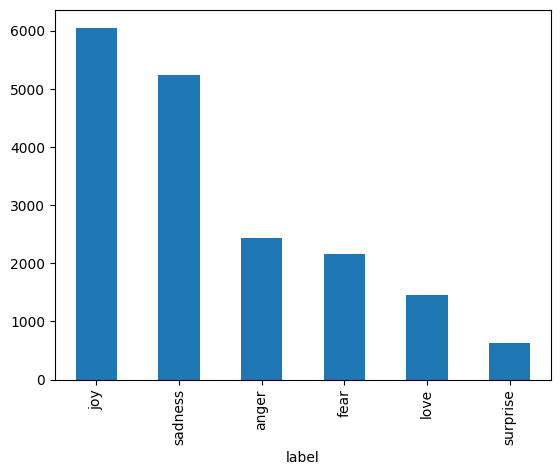

In [15]:
df.label.value_counts().plot.bar()

In [16]:
# Positive Sentiments - Joy, Love, Suprise : 1
# Negetive Sentiments - Anger, Sadeness, Fear : 0
df['label'] = df['label'].map({'joy':1, 'love':1, 'surprise':1, 'anger':0, 'sadness':0, 'fear':0})

In [17]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


<Axes: xlabel='label'>

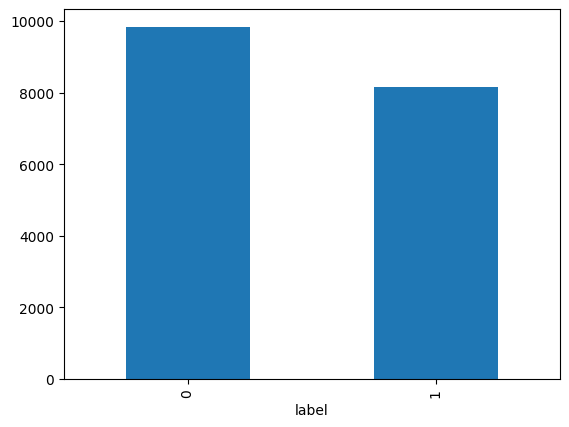

In [18]:
df.label.value_counts().plot.bar()

In [19]:
lm = WordNetLemmatizer()

In [20]:
def transformation(df_columns):
  output = []
  for i in df.text:
    new_text = re.sub('[^a-zA-Z]',' ',str(i))
    new_text = new_text.lower()
    new_text = new_text.split()
    new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
    output.append(' '.join(str(k) for k in new_text))
  return output

In [21]:
var = transformation(df.text)

In [22]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [23]:
# word Cloud
word = " "
for i in var:
  for j in i:
    word += " ".join(j)

In [24]:
word

' didnt feel humiliatedgo feeling hopeless damned hopeful around someone care awakeim grabbing minute post feel greedy wrongever feeling nostalgic fireplace know still propertyfeeling grouchyive feeling little burdened lately wasnt sureive taking milligram time recommended amount ive fallen asleep lot faster also feel like funnyfeel confused life teenager jaded year old manpetronas year feel petronas performed well made huge profitfeel romanticfeel like make suffering seeing mean somethingfeel running divine experience expect type spiritual encounterthink easiest time year feel dissatisfiedfeel low energy thirstyimmense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little preciousfeel reassured anxiety sidedidnt really feel embarrassedfeel pretty pathetic timestarted feeling sentimental doll child began collection vintage barbie doll sixtyfeel compromised skeptical value every unit work putfeel irritated re

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                min_font_size = 10).generate(word)

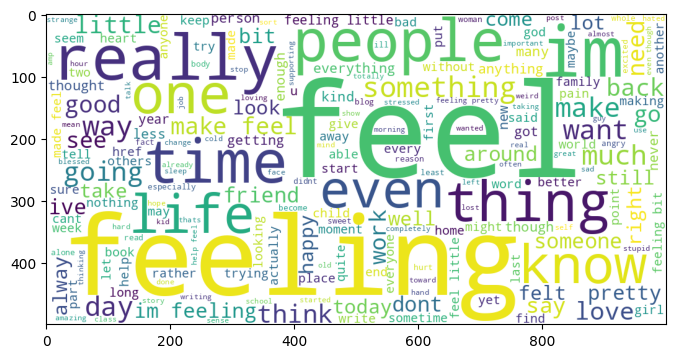

In [26]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

In [40]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [51]:
X = df['text']
y = df['label']

In [52]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [56]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(X_test_vec)

In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9558333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1964
           1       0.96      0.94      0.95      1636

    accuracy                           0.96      3600
   macro avg       0.96      0.95      0.96      3600
weighted avg       0.96      0.96      0.96      3600



In [71]:
label_mapping = {
    0: 'negative',
    1: 'positive',
}

In [72]:
def predict_sentiment(text):
    """
    Predicts the sentiment of the given text using a trained model.

    Parameters:
        text (str): Input text.

    Returns:
        str: Sentiment label ('positive', 'neutral', 'negative')
    """
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)[0]
    return label_mapping[prediction]


In [74]:
text = "I am happy"
print("Sentiment:", predict_sentiment(text))

Sentiment: positive
